In [1]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.8 MB/s eta 0:00:00


In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import warnings
warnings.filterwarnings("ignore")


In [4]:
data=pd.read_csv("/content/FAANG.csv",parse_dates=["Date"])
data.head(10)

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Profit Margin,Unnamed: 29,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Unnamed: 34,Unnamed: 35,Beta (5Y),Annual Dividend Rate
0,Apple,AAPL,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
1,Apple,AAPL,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
2,Apple,AAPL,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
3,Apple,AAPL,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
4,Apple,AAPL,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
5,Apple,AAPL,2005-01-10,1.246964,1.262500,1.212143,1.231429,1.039912,1725309600,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
6,Apple,AAPL,2005-01-11,1.218750,1.234821,1.145357,1.152857,0.973559,2611627200,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
7,Apple,AAPL,2005-01-12,1.168750,1.176786,1.130357,1.168929,0.987132,1919702400,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
8,Apple,AAPL,2005-01-13,1.316250,1.328929,1.245179,1.246429,1.052578,3164716800,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
9,Apple,AAPL,2005-01-14,1.254464,1.280714,1.235536,1.253571,1.058609,1770742400,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0


In [5]:
#data.isnull().sum()
data.any()

,0
Company,True
Ticker,True
Date,True
Open,True
High,True
Low,True
Close,True
Adj Close,True
Volume,True
Market Cap,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Company                   23055 non-null  object        
 1   Ticker                    23055 non-null  object        
 2   Date                      23055 non-null  datetime64[ns]
 3   Open                      23055 non-null  float64       
 4   High                      23055 non-null  float64       
 5   Low                       23055 non-null  float64       
 6   Close                     23055 non-null  float64       
 7   Adj Close                 23055 non-null  float64       
 8   Volume                    23055 non-null  int64         
 9   Market Cap                23055 non-null  float64       
 10  PE Ratio                  23055 non-null  float64       
 11  Beta                      18073 non-null  float64       
 12  EPS               

In [7]:
# data.drop("Trailing Twelve Months (TTM) EBITDA",axis=1,inplace=True)
# data.drop("Trailing Twelve Months (TTM) Earnings",axis=1,inplace=True)
# data.drop("Trailing Twelve Months (TTM) Revenue",axis=1,inplace=True)
# data.drop("Revenue",axis=1,inplace=True)
# data.drop("Gross Profit",axis=1,inplace=True)
# data.drop("Operating Income",axis=1,inplace=True)
# data.drop("Total Assets",axis=1,inplace=True)
# data.drop("Cash Ratio",axis=1,inplace=True)
# data.drop("Total Equity",axis=1,inplace=True)

In [8]:
data["Date"]=pd.to_datetime(data["Date"],errors='coerce')
#data.drop("date",axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Company                   23055 non-null  object        
 1   Ticker                    23055 non-null  object        
 2   Date                      23055 non-null  datetime64[ns]
 3   Open                      23055 non-null  float64       
 4   High                      23055 non-null  float64       
 5   Low                       23055 non-null  float64       
 6   Close                     23055 non-null  float64       
 7   Adj Close                 23055 non-null  float64       
 8   Volume                    23055 non-null  int64         
 9   Market Cap                23055 non-null  float64       
 10  PE Ratio                  23055 non-null  float64       
 11  Beta                      18073 non-null  float64       
 12  EPS               

In [10]:
data.head(10)

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Profit Margin,Unnamed: 29,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Unnamed: 34,Unnamed: 35,Beta (5Y),Annual Dividend Rate
0,Apple,AAPL,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
1,Apple,AAPL,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
2,Apple,AAPL,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
3,Apple,AAPL,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
4,Apple,AAPL,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
5,Apple,AAPL,2005-01-10,1.246964,1.262500,1.212143,1.231429,1.039912,1725309600,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
6,Apple,AAPL,2005-01-11,1.218750,1.234821,1.145357,1.152857,0.973559,2611627200,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
7,Apple,AAPL,2005-01-12,1.168750,1.176786,1.130357,1.168929,0.987132,1919702400,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
8,Apple,AAPL,2005-01-13,1.316250,1.328929,1.245179,1.246429,1.052578,3164716800,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0
9,Apple,AAPL,2005-01-14,1.254464,1.280714,1.235536,1.253571,1.058609,1770742400,3.580000e+12,...,0.26441,NaN,0.798,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0


In [11]:
data.info()
data['Date']=pd.to_datetime(data['Date'],format='%d-%m-%y', errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Company                   23055 non-null  object        
 1   Ticker                    23055 non-null  object        
 2   Date                      23055 non-null  datetime64[ns]
 3   Open                      23055 non-null  float64       
 4   High                      23055 non-null  float64       
 5   Low                       23055 non-null  float64       
 6   Close                     23055 non-null  float64       
 7   Adj Close                 23055 non-null  float64       
 8   Volume                    23055 non-null  int64         
 9   Market Cap                23055 non-null  float64       
 10  PE Ratio                  23055 non-null  float64       
 11  Beta                      18073 non-null  float64       
 12  EPS               

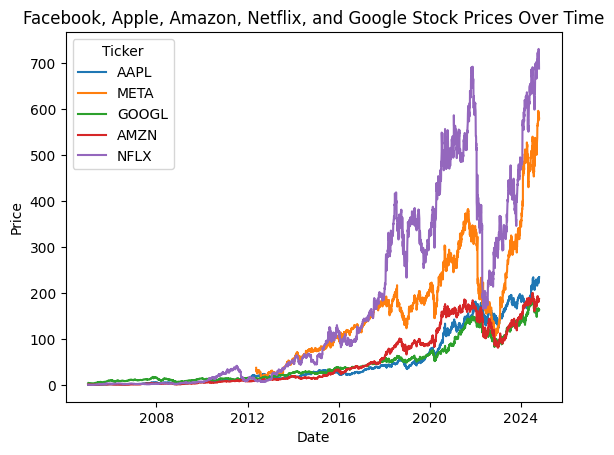

In [12]:
sns.lineplot(data=data,x='Date',y='Close',hue='Ticker')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Facebook, Apple, Amazon, Netflix, and Google Stock Prices Over Time')
plt.show()

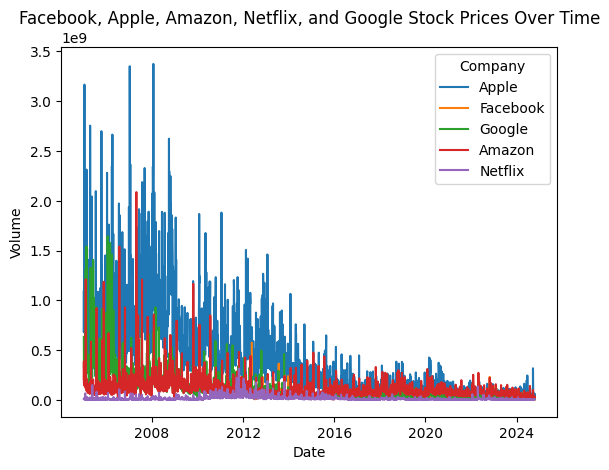

In [13]:
sns.lineplot(data=data,x='Date',y='Volume',hue='Company')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title('Facebook, Apple, Amazon, Netflix, and Google Stock Prices Over Time')
plt.plot()
plt.show()

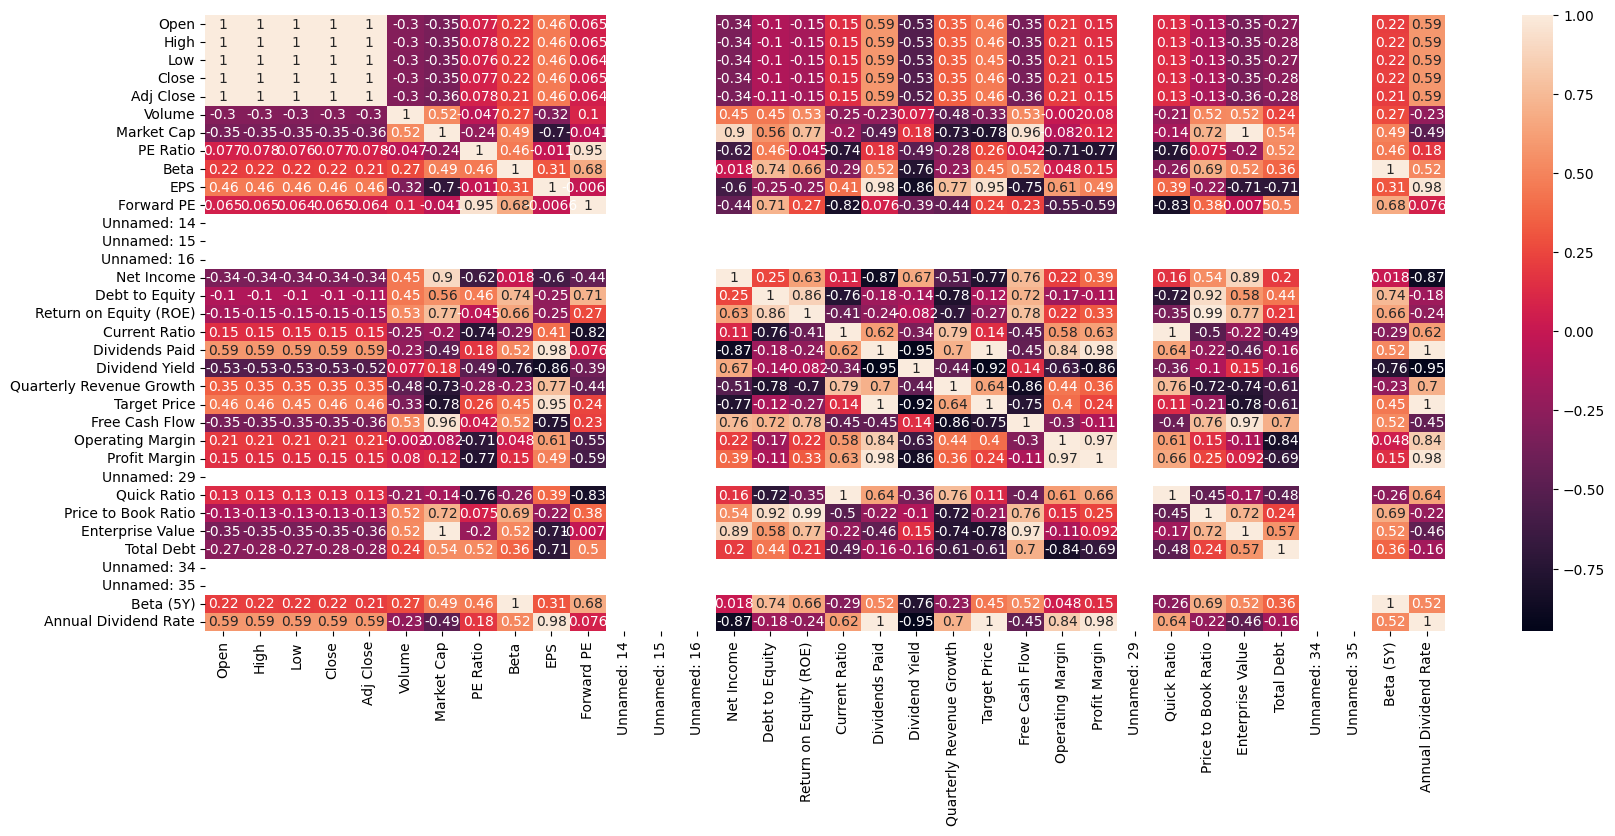

In [14]:
numericalcolumns=data.select_dtypes(include=['float64','int64']).columns
heatmap_data=data[numericalcolumns].corr()
plt.figure(figsize=(20,8))
sns.heatmap(heatmap_data,annot=True)
plt.show()

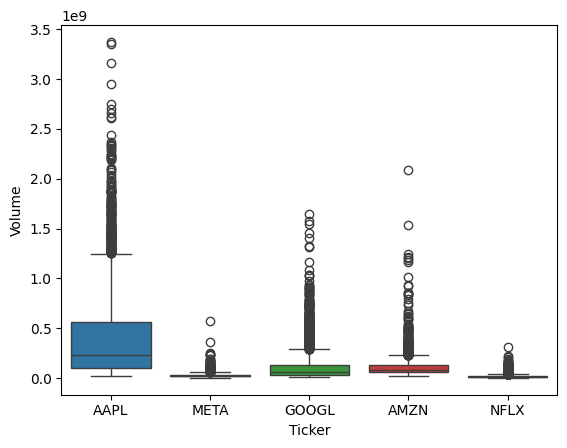

In [15]:
sns.boxplot(data=data,x='Ticker',y='Volume',hue='Ticker')
plt.show()

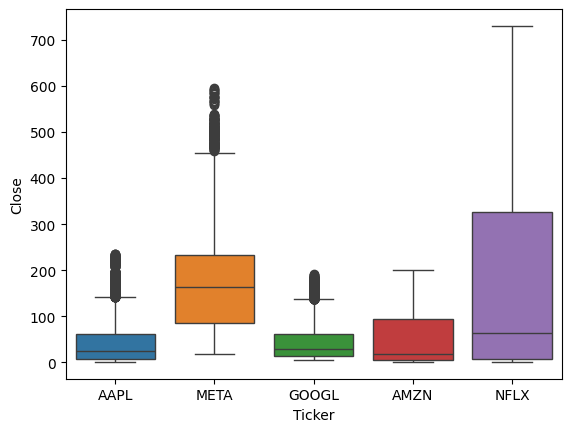

In [16]:
sns.boxplot(data=data,x='Ticker',y='Close',hue='Ticker')
plt.show()

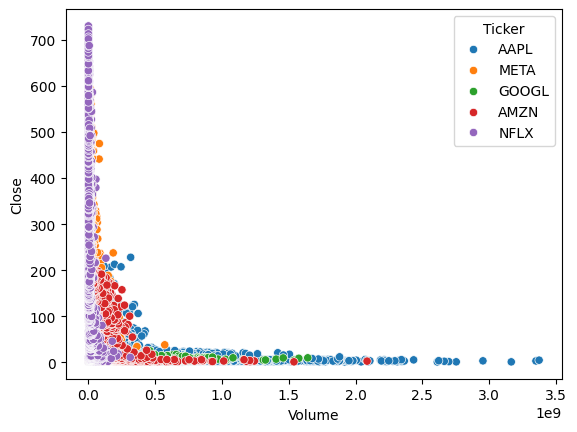

In [17]:
sns.scatterplot(data=data,x='Volume',y='Close',hue='Ticker')
plt.show()

In [18]:
data.drop('Analyst Recommendation',axis=1,inplace=True)

In [19]:
data.columns

Index(['Company', 'Ticker', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Market Cap', 'PE Ratio', 'Beta', 'EPS',
       'Forward PE', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Net Income',
       'Debt to Equity', 'Return on Equity (ROE)', 'Current Ratio',
       'Dividends Paid', 'Dividend Yield', 'Quarterly Revenue Growth',
       'Target Price', 'Free Cash Flow', 'Operating Margin', 'Profit Margin',
       'Unnamed: 29', 'Quick Ratio', 'Price to Book Ratio', 'Enterprise Value',
       'Total Debt', 'Unnamed: 34', 'Unnamed: 35', 'Beta (5Y)',
       'Annual Dividend Rate'],
      dtype='object')

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def encode(dataframe):
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    le = LabelEncoder()
    company_encoded = ohe.fit_transform(dataframe[['Company']])
    company_encoded_df = pd.DataFrame(company_encoded, columns=ohe.get_feature_names_out(['Company']))
    dataframe = pd.concat([dataframe.drop(['Company'], axis=1), company_encoded_df], axis=1)
    ticker_encoded = ohe.fit_transform(dataframe[['Ticker']])
    ticker_encoded_df = pd.DataFrame(ticker_encoded, columns=ohe.get_feature_names_out(['Ticker']))
    dataframe = pd.concat([dataframe.drop(['Ticker'], axis=1), ticker_encoded_df], axis=1)
    columns = [
    'Market Cap', 'PE Ratio', 'Beta', 'EPS', 'Forward PE', 'Net Income', 'Debt to Equity',
    'Return on Equity (ROE)', 'Current Ratio', 'Dividends Paid', 'Dividend Yield',
    'Quarterly Revenue Growth', 'Target Price', 'Free Cash Flow', 'Operating Margin',
    'Profit Margin', 'Quick Ratio', 'Price to Book Ratio', 'Enterprise Value',
    'Total Debt', 'Beta (5Y)', 'Annual Dividend Rate']

    for column in columns:
        # Check if the column exists before attempting to encode
        if column in dataframe.columns:
            dataframe[column] = le.fit_transform(dataframe[column])
        else:
            print(f"Warning: Column '{column}' not found in DataFrame. Skipping Label Encoding for this column.")

    return dataframe


faang_data = encode(data)

In [21]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# import warnings
# warnings.filterwarnings("ignore")

# def encode(dataframe):
#     ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#     le = LabelEncoder()
#     company_encoded = ohe.fit_transform(dataframe[['Company']])
#     company_encoded_df = pd.DataFrame(company_encoded, columns=ohe.get_feature_names_out(['Company']))
#     dataframe = pd.concat([dataframe.drop(['Company'], axis=1), company_encoded_df], axis=1)
#     ticker_encoded = ohe.fit_transform(dataframe[['Ticker']])
#     ticker_encoded_df = pd.DataFrame(ticker_encoded, columns=ohe.get_feature_names_out(['Ticker']))
#     dataframe = pd.concat([dataframe.drop(['Ticker'], axis=1), ticker_encoded_df], axis=1)
#     columns = [
#     'Market Cap', 'PE Ratio', 'Beta', 'EPS','Forward PE', 'Net Income', 'Debt to Equity', 'Return on Equity (ROE)',
#     'Current Ratio', 'Dividends Paid', 'Dividend Yield','Quarterly Revenue Growth', 'Target Price', 'Free Cash Flow',
#     'Operating Margin', 'Profit Margin', 'Quick Ratio','Price to Book Ratio', 'Enterprise Value', 'Total Debt', 'Beta (5Y)',
#        'Annual Dividend Rate' ]

#     for column in columns:
#         dataframe[column] = le.fit_transform(dataframe[column])

#     return dataframe


# faang_data = encode(data)

In [22]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# def encode(dataframe):
#     ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#     le = LabelEncoder()
#     company_encoded = ohe.fit_transform(dataframe[['Company']])
#     company_encoded_df = pd.DataFrame(company_encoded, columns=ohe.get_feature_names_out(['Company']))
#     dataframe = pd.concat([dataframe.drop(['Company'], axis=1), company_encoded_df], axis=1)
#     ticker_encoded = ohe.fit_transform(dataframe[['Ticker']])
#     ticker_encoded_df = pd.DataFrame(ticker_encoded, columns=ohe.get_feature_names_out(['Ticker']))
#     dataframe = pd.concat([dataframe.drop(['Ticker'], axis=1), ticker_encoded_df], axis=1)
#     columns = [
#    'Market Cap', 'PE Ratio', 'Beta', 'EPS','Forward PE', 'Net Income', 'Debt to Equity', 'Return on Equity (ROE)',
#    'Current Ratio', 'Dividends Paid', 'Dividend Yield','Quarterly Revenue Growth', 'Target Price', 'Free Cash Flow',
#    'Operating Margin', 'Profit Margin', 'Quick Ratio','Price to Book Ratio', 'Enterprise Value', 'Total Debt', 'Beta (5Y)',
#    'Annual Dividend Rate' ]

#     for column in columns:
#         dataframe[column] = le.fit_transform(dataframe[column])

#     return dataframe


# faang_data = encode(data)

In [23]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# import warnings
# warnings.filterwarnings("ignore")

# # Reload the data just before calling the encode function
# # Assuming the original data file path is correct
# data = pd.read_csv("/content/FAANG.csv", parse_dates=["Date"]) # Changed FAANGS.csv back to FAANG.csv

# # Perform any necessary drops *before* encoding if these columns were indeed meant to be dropped
# # (Although based on the encode function's logic, Company and Ticker are needed for encoding)
# # If you intended to drop these columns AFTER encoding, move these lines below the encode call.
# # If you intended to drop other columns, make sure those drops happened earlier.
# # Based on the traceback, Company and Ticker should NOT be dropped before calling encode.

# def encode(dataframe):
#     ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#     le = LabelEncoder()

#     # Check if 'Company' and 'Ticker' columns exist before one-hot encoding
#     if 'Company' in dataframe.columns:
#         company_encoded = ohe.fit_transform(dataframe[['Company']])
#         company_encoded_df = pd.DataFrame(company_encoded, columns=ohe.get_feature_names_out(['Company']))
#         dataframe = pd.concat([dataframe.drop(['Company'], axis=1), company_encoded_df], axis=1)
#     else:
#         print("Warning: 'Company' column not found for one-hot encoding.")

#     if 'Ticker' in dataframe.columns:
#         ticker_encoded = ohe.fit_transform(dataframe[['Ticker']])
#         ticker_encoded_df = pd.DataFrame(ticker_encoded, columns=ohe.get_feature_names_out(['Ticker']))
#         dataframe = pd.concat([dataframe.drop(['Ticker'], axis=1), ticker_encoded_df], axis=1)
#     else:
#          print("Warning: 'Ticker' column not found for one-hot encoding.")


#     # Add this line to print the columns after one-hot encoding for debugging
#     print("Columns after one-hot encoding:", dataframe.columns)

#     columns = [
#     'Market Cap', 'PE Ratio', 'Beta', 'EPS','Forward PE', 'Net Income', 'Debt to Equity', 'Return on Equity (ROE)',
#     'Current Ratio', 'Dividends Paid', 'Dividend Yield','Quarterly Revenue Growth', 'Target Price', 'Free Cash Flow',
#     'Operating Margin', 'Profit Margin', 'Quick Ratio','Price to Book Ratio', 'Enterprise Value', 'Total Debt', 'Beta (5Y)',
#        'Annual Dividend Rate' ]

#     for column in columns:
#         # Check if the column exists before trying to encode
#         # Also check if the column has non-null values to avoid errors with LabelEncoder on all NaNs
#         if column in dataframe.columns and dataframe[column].notna().any():
#             try:
#                  dataframe[column] = le.fit_transform(dataframe[column].astype(str)) # Convert to string to handle mixed types/NaNs
#             except Exception as e:
#                  print(f"Error encoding column '{column}': {e}")
#         else:
#             print(f"Warning: Column '{column}' not found or is all NaN/empty in DataFrame. Skipping Label Encoding for this column.")


#     return dataframe

# # Call the encode function with the reloaded data
# faang_data = encode(data)

# # You can now inspect faang_data
# # display(faang_data.head())
# # display(faang_data.info())

In [24]:
Apple= faang_data[faang_data['Ticker_AAPL'] == 1]
Facebook= faang_data[faang_data['Ticker_META'] == 1]
Amazon= faang_data[faang_data['Ticker_AMZN'] == 1]
Netflix= faang_data[faang_data['Ticker_NFLX'] == 1]
Google= faang_data[faang_data['Ticker_GOOGL'] == 1]

In [25]:
Apple.drop(['Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX','Company_Amazon','Company_Facebook','Company_Google','Unnamed: 14','Unnamed: 15', 'Unnamed: 16 ','Company_Netflix','Unnamed: 29','Unnamed: 34', 'Unnamed: 35 '], axis=1, inplace=True, errors='ignore')

In [26]:
Amazon.drop(['Ticker_AAPL', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX','Company_Apple','Company_Facebook','Company_Google','Unnamed: 14','Unnamed: 15', 'Unnamed: 16 ','Company_Netflix','Unnamed: 29','Unnamed: 34', 'Unnamed: 35 '], axis=1, inplace=True, errors='ignore')

In [27]:
Facebook.drop(['Ticker_AAPL','Ticker_AMZN', 'Ticker_GOOGL','Ticker_NFLX','Company_Apple','Company_Amazon','Company_Google','Company_Netflix','Unnamed: 14','Unnamed: 15', 'Unnamed: 16 ','Unnamed: 29','Unnamed: 34', 'Unnamed: 35 '], axis=1, inplace=True, errors='ignore')

In [28]:
Google.drop(['Ticker_AAPL','Ticker_AMZN', 'Ticker_META','Ticker_NFLX','Company_Apple','Company_Amazon','Company_Facebook','Company_Netflix','Unnamed: 14','Unnamed: 15', 'Unnamed: 16 ','Unnamed: 29','Unnamed: 34', 'Unnamed: 35 '], axis=1, inplace=True, errors='ignore')

In [29]:
Netflix.drop(['Ticker_AAPL','Ticker_AMZN', 'Ticker_META','Ticker_GOOGL','Company_Apple','Company_Amazon','Company_Facebook','Company_Google','Unnamed: 14','Unnamed: 15', 'Unnamed: 16 ','Unnamed: 29','Unnamed: 34', 'Unnamed: 35 '], axis=1, inplace=True, errors='ignore')

In [30]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 0 to 4982
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      4983 non-null   datetime64[ns]
 1   Open                      4983 non-null   float64       
 2   High                      4983 non-null   float64       
 3   Low                       4983 non-null   float64       
 4   Close                     4983 non-null   float64       
 5   Adj Close                 4983 non-null   float64       
 6   Volume                    4983 non-null   int64         
 7   Market Cap                4983 non-null   int64         
 8   PE Ratio                  4983 non-null   int64         
 9   Beta                      4983 non-null   int64         
 10  EPS                       4983 non-null   int64         
 11  Forward PE                4983 non-null   int64         
 12  Unnamed: 16              

In [31]:
Amazon

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,...,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Unnamed: 35,Beta (5Y),Annual Dividend Rate,Company_Amazon,Ticker_AMZN
13091,2005-01-03,2.247500,2.272000,2.210500,2.226000,2.226000,208930000,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0
13092,2005-01-04,2.133500,2.163000,2.075000,2.107000,2.107000,388370000,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0
13093,2005-01-05,2.078500,2.138000,2.078000,2.088500,2.088500,167084000,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0
13094,2005-01-06,2.090500,2.112500,2.045000,2.052500,2.052500,174018000,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0
13095,2005-01-07,2.069000,2.134500,2.058000,2.116000,2.116000,196732000,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18068,2024-10-11,186.630005,189.929993,186.300003,188.820007,188.820007,25751600,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0
18069,2024-10-14,189.779999,189.830002,187.360001,187.539993,187.539993,22614400,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0
18070,2024-10-15,187.630005,188.410004,184.580002,187.690002,187.690002,32178900,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0
18071,2024-10-16,187.050003,187.779999,185.610001,186.889999,186.889999,23456800,2,4,1,...,0,1,1,3,4,NaN,1,3,1.0,1.0


In [32]:
#Netflix.drop('Trailing Twelve Months (TTM) EBITDA',axis=1,inplace=True)
#Netflix.drop('Trailing Twelve Months (TTM) Earnings',axis=1,inplace=True)
#Netflix.drop('Trailing Twelve Months (TTM) Revenue',axis=1,inplace=True)
#Netflix.drop('Unnamed: 34',axis=1,inplace=True)
#Netflix.drop('Unnamed: 35',axis=1,inplace=True)
#Netflix.drop('Unnamed: 29',axis=1,inplace=True)
Netflix

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,...,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Unnamed: 35,Beta (5Y),Annual Dividend Rate,Company_Netflix,Ticker_NFLX
18073,2005-01-03,1.800000,1.800000,1.645714,1.702857,1.702857,11334400,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0
18074,2005-01-04,1.702857,1.707143,1.607143,1.665714,1.665714,17352300,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0
18075,2005-01-05,1.677143,1.677143,1.584286,1.600000,1.600000,12732300,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0
18076,2005-01-06,1.600000,1.624286,1.572857,1.578571,1.578571,8273300,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0
18077,2005-01-07,1.587143,1.650000,1.571429,1.588571,1.588571,7490700,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,2024-10-11,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0
23051,2024-10-14,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0
23052,2024-10-15,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0
23053,2024-10-16,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,0,3,4,...,1,2,3,0,0,NaN,4,3,1.0,1.0


In [33]:
# # file ipython-input-125-5b54c463a86a
# def coorelation(dataframes): # Changed parameter name to dataframes
#     for frames in dataframes: # Iterate over dataframes
#         correlation_with_close=frames[['Open','High','Low','Adj Close','Volume','Close']].corr()['Close'].sort_values(ascending=False)
#         print(f'\nFeatures:')
#         threshold=0.2
#         selectedfeatures=correlation_with_close[(abs(correlation_with_close)>threshold) | (abs(correlation_with_close)<-threshold)]
#         print(selectedfeatures)

# company_dataframes=[Apple,Amazon,Facebook,Google,Netflix] # Use a new variable name for the list
# coorelation(company_dataframes) # Pass the list to the function

In [34]:
def coorelation(data):
    for frames in data:
        correlation_with_close=frames[['Open','High','Low','Adj Close','Volume','Close']].corr()['Close'].sort_values(ascending=False)
        print(f'\nFeatures:')
        threshold=0.2
        selectedfeatures=correlation_with_close[(abs(correlation_with_close)>threshold) | (abs(correlation_with_close)<-threshold)]
        print(selectedfeatures)

data=[Apple,Amazon,Facebook,Google,Netflix]
coorelation(data)


Features:
Close        1.000000
High         0.999922
Low          0.999921
Adj Close    0.999886
Open         0.999831
Volume      -0.539481
Name: Close, dtype: float64

Features:
Close        1.000000
Adj Close    1.000000
Low          0.999896
High         0.999891
Open         0.999768
Volume      -0.298390
Name: Close, dtype: float64

Features:
Close        1.000000
Adj Close    0.999999
Low          0.999815
High         0.999801
Open         0.999569
Volume      -0.381803
Name: Close, dtype: float64

Features:
Close        1.000000
Adj Close    1.000000
Low          0.999916
High         0.999903
Open         0.999796
Volume      -0.456073
Name: Close, dtype: float64

Features:
Close        1.000000
Adj Close    1.000000
Low          0.999860
High         0.999859
Open         0.999688
Volume      -0.343540
Name: Close, dtype: float64


In [35]:
# data.drop('Trailing Twelve Months (TTM) Revenue',axis=1,inplace=True)
# data.drop('Trailing Twelve Months (TTM) EBITDA',axis=1,inplace=True)
# data.drop('Trailing Twelve Months (TTM) Earnings',axis=1,inplace=True)

In [36]:
def split_date(data):
    for df in data:
        df['Month']=pd.to_datetime(df['Date']).dt.month
        df['Year']=pd.to_datetime(df['Date']).dt.year
        df['Day']=pd.to_datetime(df['Date']).dt.day
        df.drop('Date',inplace=True,axis=1)
        return df

data=[Netflix]
split_date(data)

,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,EPS,...,Enterprise Value,Total Debt,Unnamed: 35,Beta (5Y),Annual Dividend Rate,Company_Netflix,Ticker_NFLX,Month,Year,Day
18073,1.800000,1.800000,1.645714,1.702857,1.702857,11334400,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,1,2005,3
18074,1.702857,1.707143,1.607143,1.665714,1.665714,17352300,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,1,2005,4
18075,1.677143,1.677143,1.584286,1.600000,1.600000,12732300,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,1,2005,5
18076,1.600000,1.624286,1.572857,1.578571,1.578571,8273300,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,1,2005,6
18077,1.587143,1.650000,1.571429,1.588571,1.588571,7490700,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,1,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,10,2024,11
23051,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,10,2024,14
23052,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,10,2024,15
23053,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,0,3,4,3,...,0,0,NaN,4,3,1.0,1.0,10,2024,16


In [37]:
# Re-create individual company DataFrames from faang_data
Apple = faang_data[faang_data['Ticker_AAPL'] == 1].copy()
Facebook = faang_data[faang_data['Ticker_META'] == 1].copy()
Amazon = faang_data[faang_data['Ticker_AMZN'] == 1].copy()
Netflix = faang_data[faang_data['Ticker_NFLX'] == 1].copy()
Google = faang_data[faang_data['Ticker_GOOGL'] == 1].copy()

# Now drop the 'Analyst Recommendation' column from each DataFrame
# Use errors='ignore' to prevent issues if the column was already dropped or not present
Apple.drop(['Analyst Recommendation'], axis=1, inplace=True, errors='ignore')
Amazon.drop(['Analyst Recommendation'], axis=1, inplace=True, errors='ignore')
Google.drop(['Analyst Recommendation'], axis=1, inplace=True, errors='ignore')
Netflix.drop(['Analyst Recommendation'], axis=1, inplace=True, errors='ignore')
Facebook.drop(['Analyst Recommendation'], axis=1, inplace=True, errors='ignore')

# Also drop the 'Unnamed' columns if they still exist, using errors='ignore'
unnamed_cols = ['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16 ', 'Unnamed: 29', 'Unnamed: 34', 'Unnamed: 35 ']
for df in [Apple, Amazon, Facebook, Google, Netflix]:
    df.drop(unnamed_cols, axis=1, inplace=True, errors='ignore')

In [38]:
Apple.to_csv('Apple.csv',index=False)
Amazon.to_csv('Amazon.csv',index=False)
Google.to_csv('Google.csv',index=False)
Netflix.to_csv('Netflix.csv',index=False)
Facebook.to_csv('Facebook.csv',index=False)

In [39]:
Apple_data=pd.read_csv('Apple.csv')
Amazon_data=pd.read_csv('Amazon.csv')
Google_data=pd.read_csv('Google.csv')
Netflix_data=pd.read_csv('Netflix.csv')
Facebook_data=pd.read_csv('Facebook.csv')

In [40]:
def featueselection(data):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    import numpy as np # Import numpy here

    # Create a copy to avoid modifying the original DataFrame
    data = data.copy()

    # Drop the 'Analyst Recommendation' column if it exists
    if 'Analyst Recommendation' in data.columns:
        data = data.drop('Analyst Recommendation', axis=1)
        print("Dropped 'Analyst Recommendation' column.")

    # Drop 'Date' and any other non-numeric columns that are not intended features
    # Also include 'Unnamed' columns which were identified earlier
    columns_to_drop = ['Date', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 29', 'Unnamed: 34', 'Unnamed: 35']
    for col in columns_to_drop:
        if col in data.columns:
            data = data.drop(col, axis=1)
            print(f"Dropped '{col}' column.")


    X=data.drop('Close',axis=1)
    y=data['Close']

    # Display data types of features before scaling for debugging
    print("\nData types of features (X) before scaling:")
    print(X.dtypes)

    # Select only numeric columns for scaling and model training
    X = X.select_dtypes(include=np.number)


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    rfr=RandomForestRegressor(n_estimators=1000,random_state=42)
    rfr.fit(X_train,y_train)
    feature_names=X.columns
    importance=rfr.feature_importances_
    featureimportance_df=pd.DataFrame({'Feature':feature_names,'Importance':importance}).sort_values(by='Importance',ascending=False)
    print(featureimportance_df)

featueselection(Netflix_data)

Dropped 'Date' column.
Dropped 'Unnamed: 16' column.
Dropped 'Unnamed: 35' column.

Data types of features (X) before scaling:
Open                        float64
High                        float64
Low                         float64
Adj Close                   float64
Volume                        int64
Market Cap                    int64
PE Ratio                      int64
Beta                          int64
EPS                           int64
Forward PE                    int64
Net Income                    int64
Debt to Equity                int64
Return on Equity (ROE)        int64
Current Ratio                 int64
Dividends Paid                int64
Dividend Yield                int64
Quarterly Revenue Growth      int64
Target Price                  int64
Free Cash Flow                int64
Operating Margin              int64
Profit Margin                 int64
Quick Ratio                   int64
Price to Book Ratio           int64
Enterprise Value              int64
Total Deb

In [41]:
import mlflow
def linearmodel(data,columns):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
    X=data[columns]
    y=data['Close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    LRModel=LinearRegression()
    LRModel.fit(X_train,y_train)
    y_pred=LRModel.predict(X_test)
    print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_pred)}')
    print(f'R2 Score:{r2_score(y_test,y_pred)}')
    print(f'Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred)}')
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred))
        mlflow.sklearn.log_model(LRModel,'LinearRegression')


linearmodel(Netflix_data,['Open','High','Low','Adj Close','Volume'])

2025/11/05 13:30:34 INFO mlflow.tracking.fluent: Experiment with name 'Netflix' does not exist. Creating a new experiment.


Mean Absolute Error:2.431510915937828e-13
R2 Score:1.0
Root Mean Squared Error:2.8039347788140255e-13


2025/11/05 13:30:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/05 13:30:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [42]:
def decisiontreemodel(data,columns):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
    X=data[columns]
    y=data['Close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    DTModel=DecisionTreeRegressor()
    DTModel.fit(X_train,y_train)
    y_pred=DTModel.predict(X_test)
    print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_pred)}')
    print(f'R2 Score:{r2_score(y_test,y_pred)}')
    print(f'Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred)}')
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred))
        mlflow.sklearn.log_model(DTModel,'DecisionTreeRegressor')

decisiontreemodel(Netflix_data,['Open','High','Low','Adj Close','Volume'])

2025/11/05 13:30:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Mean Absolute Error:0.1810457386128393
R2 Score:0.9999959949765622
Root Mean Squared Error:0.39642764004320935


2025/11/05 13:30:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [43]:
def randomforestmodel(data,columns):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
    X=data[columns]
    y=data['Close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    RFModel=RandomForestRegressor(n_estimators=1000,random_state=42)
    RFModel.fit(X_train,y_train)
    y_pred=RFModel.predict(X_test)
    print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_pred)}')
    print(f'R2 Score:{r2_score(y_test,y_pred)}')
    print(f'Root Mean Squared Error:{root_mean_squared_error(y_test,y_pred)}')
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred))
        mlflow.sklearn.log_model(RFModel,'RandomForestRegressor')

randomforestmodel(Netflix_data,['Open','High','Low','Adj Close','Volume'])

2025/11/05 13:31:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Mean Absolute Error:0.1299525263935256
R2 Score:0.9999973934530433
Root Mean Squared Error:0.319811570927504


2025/11/05 13:31:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


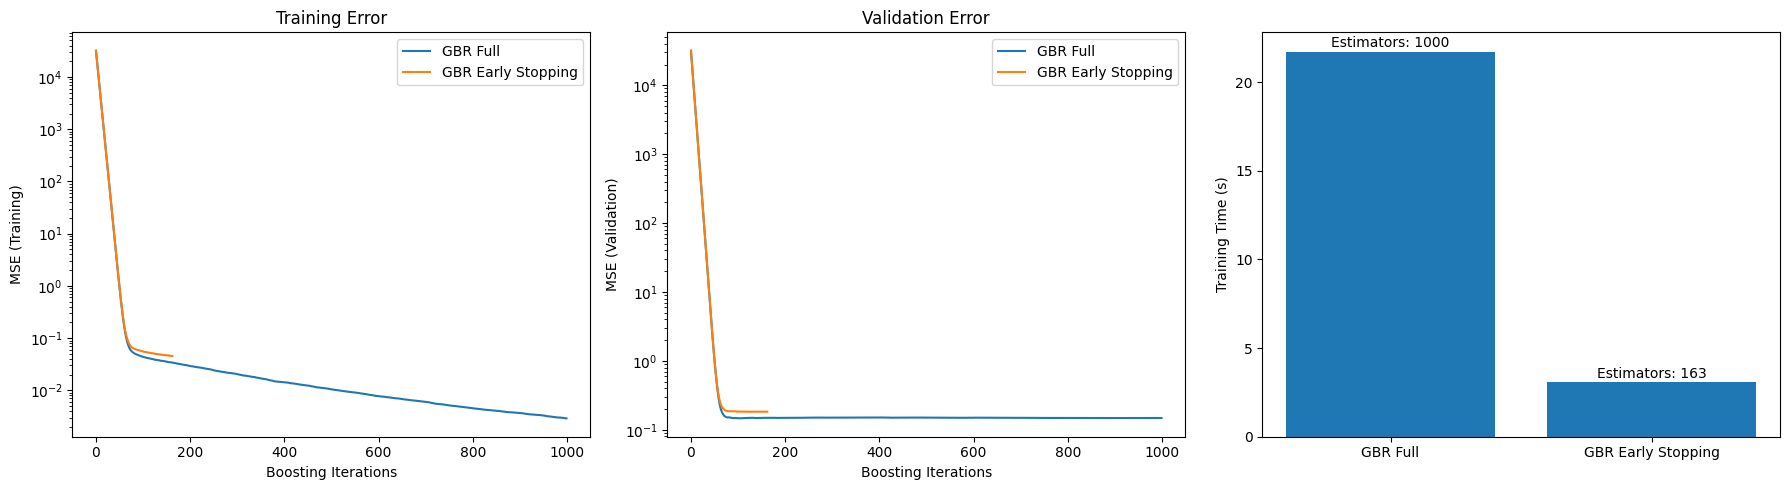

2025/11/05 13:32:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


MAE: 0.21596295542946792
R2: 0.9999962124951378
RMSE: 0.38551208393858216


2025/11/05 13:32:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,root_mean_squared_error
import time
def gradientboostingmodel(data, feature_columns, target_column='Close'):
    # Splitting data
    X = data[feature_columns]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model parameters
    parameters = dict(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42)

    # Models
    gbr_full = GradientBoostingRegressor(**parameters)
    gbr_early_stopping = GradientBoostingRegressor(
        **parameters, validation_fraction=0.1, n_iter_no_change=10
    )

    # Training models
    start_time_full = time.time()
    gbr_full.fit(X_train, y_train)
    training_time_full = time.time() - start_time_full

    start_time_early = time.time()
    gbr_early_stopping.fit(X_train, y_train)
    training_time_early_stopping = time.time() - start_time_early

    # Tracking errors
    train_errors_full, val_errors_full = [], []
    train_errors_early, val_errors_early = [], []

    for train_pred, val_pred in zip(
        gbr_full.staged_predict(X_train), gbr_full.staged_predict(X_test)
    ):
        train_errors_full.append(mean_squared_error(y_train, train_pred))
        val_errors_full.append(mean_squared_error(y_test, val_pred))

    for train_pred, val_pred in zip(
        gbr_early_stopping.staged_predict(X_train), gbr_early_stopping.staged_predict(X_test)
    ):
        train_errors_early.append(mean_squared_error(y_train, train_pred))
        val_errors_early.append(mean_squared_error(y_test, val_pred))

    # Plotting
    fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

    axes[0].plot(train_errors_full, label="GBR Full")
    axes[0].plot(train_errors_early, label="GBR Early Stopping")
    axes[0].set_xlabel("Boosting Iterations")
    axes[0].set_ylabel("MSE (Training)")
    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].set_title("Training Error")

    axes[1].plot(val_errors_full, label="GBR Full")
    axes[1].plot(val_errors_early, label="GBR Early Stopping")
    axes[1].set_xlabel("Boosting Iterations")
    axes[1].set_ylabel("MSE (Validation)")
    axes[1].set_yscale("log")
    axes[1].legend()
    axes[1].set_title("Validation Error")

    training_times = [training_time_full, training_time_early_stopping]
    labels = ["GBR Full", "GBR Early Stopping"]
    bars = axes[2].bar(labels, training_times)
    axes[2].set_ylabel("Training Time (s)")

    for bar, n_estimators in zip(
        bars, [gbr_full.n_estimators_, gbr_early_stopping.n_estimators_]
    ):
        height = bar.get_height()
        axes[2].text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            f"Estimators: {n_estimators}",
            ha="center",
            va="bottom",
        )

    plt.tight_layout()
    plt.show()

    # Final Model with Optimal Estimators
    optimal_n_estimators = gbr_early_stopping.n_estimators_
    final_model = GradientBoostingRegressor(
        n_estimators=optimal_n_estimators,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
    )
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse =root_mean_squared_error(y_test, y_pred)

    print(f"MAE: {mae}")
    print(f"R2: {r2}")
    print(f"RMSE: {rmse}")
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',feature_columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred))
        mlflow.sklearn.log_model(final_model,'GradientBoostingRegressor')

gradientboostingmodel(Netflix_data, ['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [45]:
def xgbmodel(data,columns):
    from sklearn.model_selection import train_test_split
    from xgboost import XGBRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error
    X=data[columns]
    y=data['Close']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    xgb=XGBRegressor(objective="reg:squarederror",n_estimators=2000,seed=123,max_depth=5,learning_rate=0.1,random_state=42)


    xgb.fit(X_train,y_train)
    y_pred_xgb=xgb.predict(X_test)


    mae5=mean_absolute_error(y_test,y_pred_xgb)
    r25=r2_score(y_test,y_pred_xgb)
    rmse5=root_mean_squared_error(y_test,y_pred_xgb)
    print(f'Mean Absolute Error: {mae5}')
    print(f'R-squared: {r25}')
    print(f'RMSE: {rmse5}')
    mlflow.set_experiment('Netflix')
    with mlflow.start_run():
        mlflow.log_param('Columns',columns)
        mlflow.log_metric('Mean Absolute Error',mean_absolute_error(y_test,y_pred_xgb))
        mlflow.log_metric('R2 Score',r2_score(y_test,y_pred_xgb))
        mlflow.log_metric('Root Mean Squared Error',root_mean_squared_error(y_test,y_pred_xgb))
        mlflow.sklearn.log_model(xgb,'XGBRegressor')

xgbmodel(Netflix_data,['Open','High','Low','Adj Close','Volume'])

2025/11/05 13:32:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Mean Absolute Error: 0.8500274635330722
R-squared: 0.9999066464205136
RMSE: 1.9139336741143655


2025/11/05 13:32:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
